<a href="https://colab.research.google.com/github/jd2504/bme_dsp_2025/blob/main/colored_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys

bme_repo = "https://github.com/jd2504/bme_dsp_2025.git"
repo_name = bme_repo.split('/')[-1].replace('.git', '')
!git clone {bme_repo}
sys.path.append(os.path.join(os.getcwd(), repo_name))
import bmedsp_helpers as bme

Cloning into 'bme_dsp_2025'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 82 (delta 38), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (82/82), 3.29 MiB | 6.41 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from IPython.display import Audio

[colors of noise](https://en.wikipedia.org/wiki/Colors_of_noise) wiki

In [ ]:
dur = 5
fs = 44100
n = int(fs*dur)

x = np.random.randn(n)

# brownian
b_b, a_b = np.array([1.0]), np.array([1.0, -1.0])
x_b = signal.lfilter(b_b, a_b, x)

# blue
b_bl, a_bl = np.array([1.0, -1.0]), np.array([1.0])
x_bl = signal.lfilter(b_bl, a_bl, x)

# violet
b_v, a_v = np.array([1.0, -2.0, 1.0]), np.array([1.0])
x_v = signal.lfilter(b_v, a_v, x)

# pink
b_p, a_p = b_pink = np.array([0.01]), np.array([1.0, -0.99])
x_p = signal.lfilter(b_p, a_p, x)

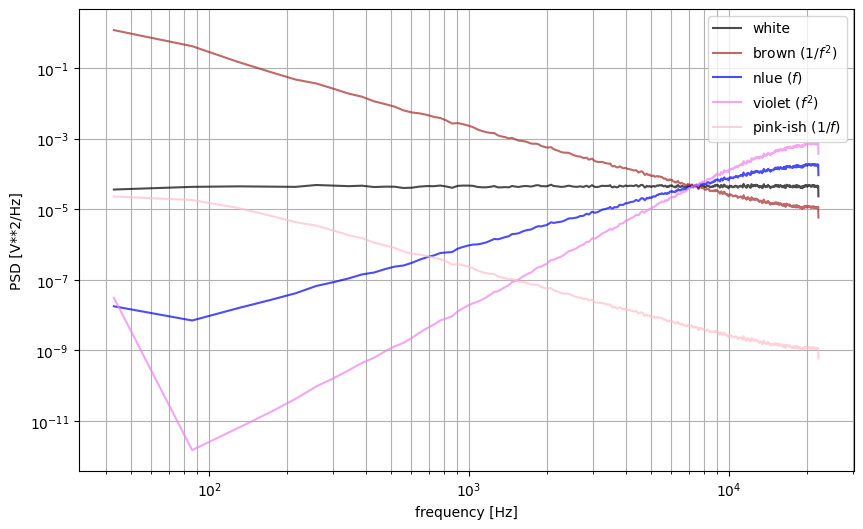

In [ ]:
plt.figure(figsize=(10, 6))

f_w, Pxx_w = signal.welch(x, fs, nperseg=1024)
plt.loglog(f_w[1:], Pxx_w[1:], label='white', alpha=0.7, c="black")

f_b, Pxx_b = signal.welch(x_b, fs, nperseg=1024)
plt.loglog(f_b[1:], Pxx_b[1:], label='brown ($1/f^2$)', alpha=0.7, c="brown")

f_bl, Pxx_bl = signal.welch(x_bl, fs, nperseg=1024)
plt.loglog(f_bl[1:], Pxx_bl[1:], label='nlue ($f$)', alpha=0.7, c="blue")

f_v, Pxx_v = signal.welch(x_v, fs, nperseg=1024)
plt.loglog(f_v[1:], Pxx_v[1:], label='violet ($f^2$)', alpha=0.7, c="violet")

f_p, Pxx_p = signal.welch(x_p, fs, nperseg=1024)
plt.loglog(f_p[1:], Pxx_p[1:], label='pink-ish ($1/f$)', alpha=0.7, c="pink")

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.grid(True, which="both")

plt.show()

In [ ]:
# print(f"white\t{np.std(x):.3f}")
# print(f"brown\t{np.std(x_b):.3f}")
# print(f"blue\t{np.std(x_bl):.3f}")
# print(f"violet\t{np.std(x_v):.3f}")
# print(f"pink\t{np.std(x_p):.3f}")

Audio(x_b, rate=fs)